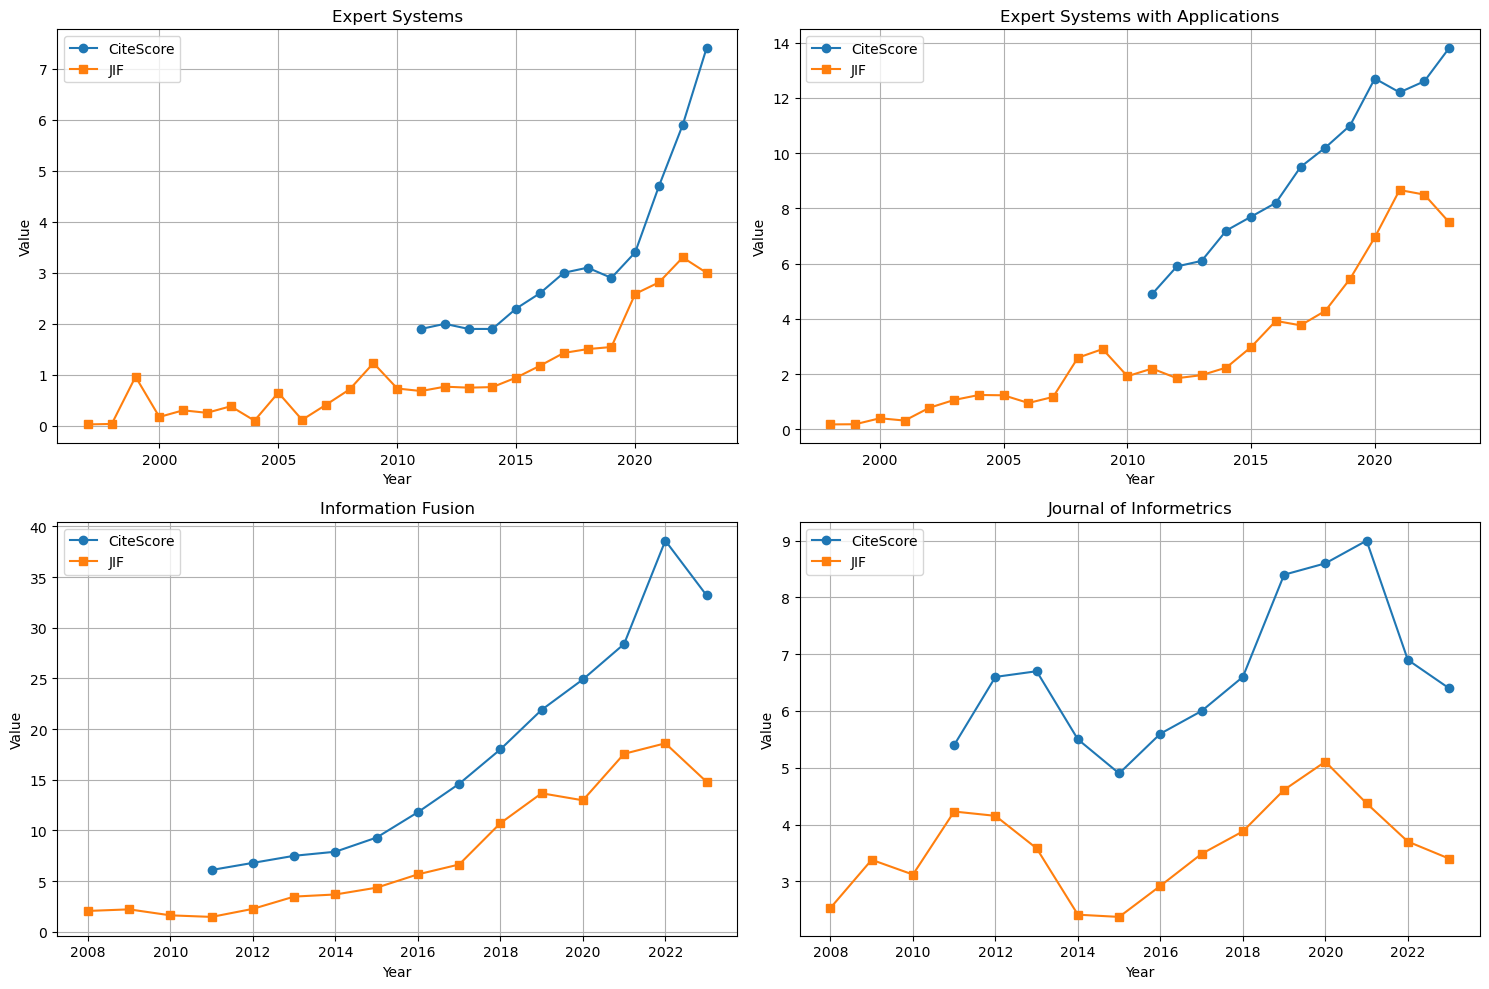

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (실제 파일 경로로 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience.csv"
df = pd.read_csv(file_path)

# 필요한 컬럼들을 숫자형으로 변환 (오류 발생 시 NaN 처리)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CiteScore'] = pd.to_numeric(df['CiteScore'], errors='coerce')
df['Journal impact factor'] = pd.to_numeric(df['Journal impact factor'], errors='coerce')

# 비교할 4개의 저널 선택 (데이터에 있는 실제 저널명으로 변경하세요)
selected_journals = ["Expert Systems", "Expert Systems with Applications", "Information Fusion", "Journal of Informetrics"]

# 선택한 저널만 필터링
df_selected = df[df['Source'].isin(selected_journals)]

# 2x2 subplot 생성 (4개 저널용)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axes = axes.flatten()

for i, journal in enumerate(selected_journals):
    ax = axes[i]
    # 해당 저널 데이터 연도 순 정렬
    journal_data = df_selected[df_selected['Source'] == journal].sort_values('Year')
    
    # CiteScore와 JIF (Journal impact factor) 시계열 그래프 그리기
    ax.plot(journal_data['Year'], journal_data['CiteScore'], marker='o', label='CiteScore')
    ax.plot(journal_data['Year'], journal_data['Journal impact factor'], marker='s', label='JIF')
    
    ax.set_title(journal)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

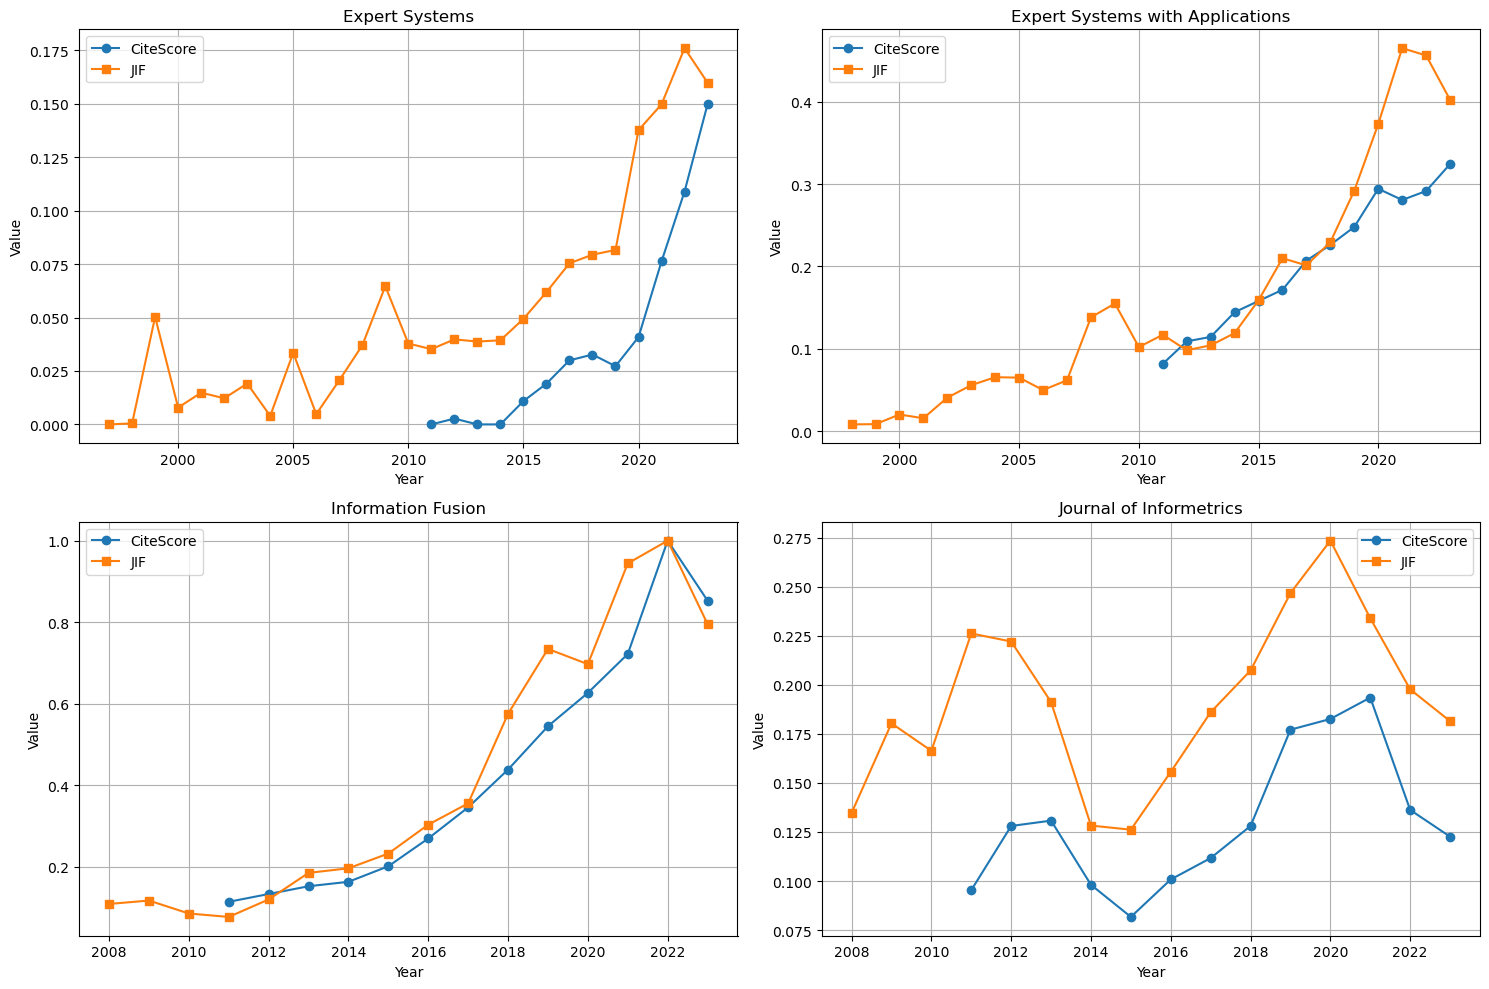

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (실제 파일 경로로 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_minmax_scaled.csv"
df = pd.read_csv(file_path)

# 필요한 컬럼들을 숫자형으로 변환 (오류 발생 시 NaN 처리)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CiteScore'] = pd.to_numeric(df['CiteScore'], errors='coerce')
df['Journal impact factor'] = pd.to_numeric(df['Journal impact factor'], errors='coerce')

# 비교할 4개의 저널 선택 (데이터에 있는 실제 저널명으로 변경하세요)
selected_journals = ["Expert Systems", "Expert Systems with Applications", "Information Fusion", "Journal of Informetrics"]

# 선택한 저널만 필터링
df_selected = df[df['Source'].isin(selected_journals)]

# 2x2 subplot 생성 (4개 저널용)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axes = axes.flatten()

for i, journal in enumerate(selected_journals):
    ax = axes[i]
    # 해당 저널 데이터 연도 순 정렬
    journal_data = df_selected[df_selected['Source'] == journal].sort_values('Year')
    
    # CiteScore와 JIF (Journal impact factor) 시계열 그래프 그리기
    ax.plot(journal_data['Year'], journal_data['CiteScore'], marker='o', label='CiteScore')
    ax.plot(journal_data['Year'], journal_data['Journal impact factor'], marker='s', label='JIF')
    
    ax.set_title(journal)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

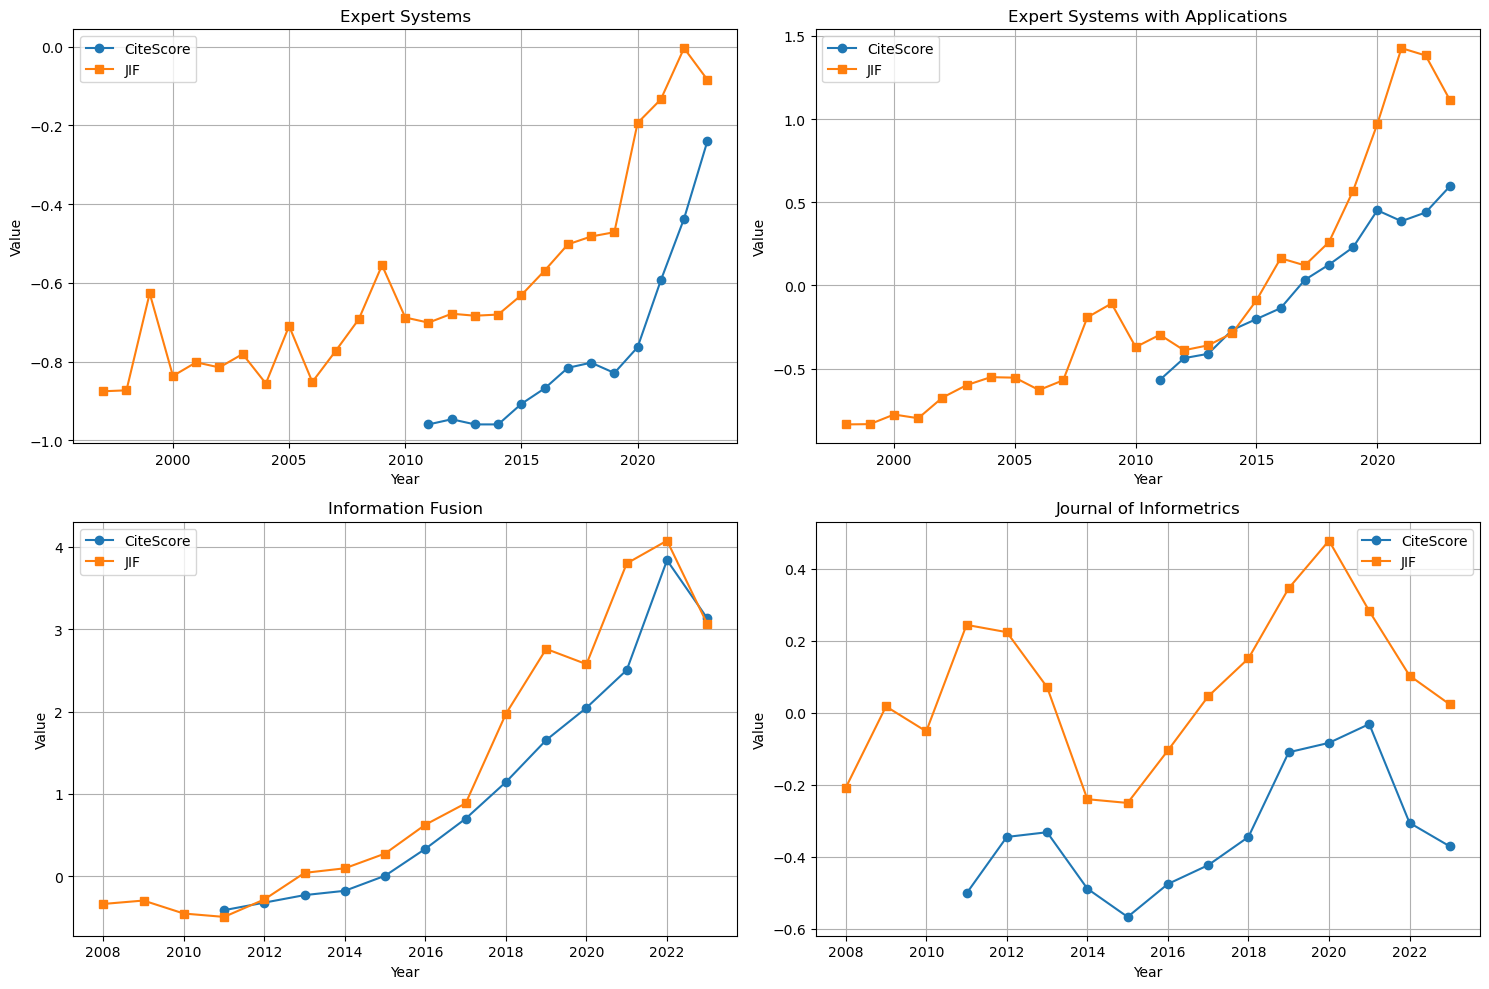

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (실제 파일 경로로 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_standard_scaled.csv"
df = pd.read_csv(file_path)

# 필요한 컬럼들을 숫자형으로 변환 (오류 발생 시 NaN 처리)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CiteScore'] = pd.to_numeric(df['CiteScore'], errors='coerce')
df['Journal impact factor'] = pd.to_numeric(df['Journal impact factor'], errors='coerce')

# 비교할 4개의 저널 선택 (데이터에 있는 실제 저널명으로 변경하세요)
selected_journals = ["Expert Systems", "Expert Systems with Applications", "Information Fusion", "Journal of Informetrics"]

# 선택한 저널만 필터링
df_selected = df[df['Source'].isin(selected_journals)]

# 2x2 subplot 생성 (4개 저널용)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axes = axes.flatten()

for i, journal in enumerate(selected_journals):
    ax = axes[i]
    # 해당 저널 데이터 연도 순 정렬
    journal_data = df_selected[df_selected['Source'] == journal].sort_values('Year')
    
    # CiteScore와 JIF (Journal impact factor) 시계열 그래프 그리기
    ax.plot(journal_data['Year'], journal_data['CiteScore'], marker='o', label='CiteScore')
    ax.plot(journal_data['Year'], journal_data['Journal impact factor'], marker='s', label='JIF')
    
    ax.set_title(journal)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, MaxAbsScaler

# 1. CSV 파일 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience.csv"
df = pd.read_csv(file_path)

# 2. 전처리 시 숫자형이어야 하는 컬럼들을 명시적으로 숫자형으로 변환
# (데이터셋에 존재하는 컬럼명에 맞게 수정)
columns_to_convert = [
    "CiteScore", "SJR", "SNIP", "Citations", "Documents",
    "% Not Cited", "% Review", "Total Citations", "Journal impact factor",
    "JIF without self cites", "5 Year Impact Factor", "Immediacy Index",
    "Citable items", "% of articles in Citable items", "Average JIF Percentile"
]

for col in columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 3. 스케일링 대상 숫자형 컬럼 선택 (단, 'Year'는 제외)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Year" in numeric_cols:
    numeric_cols.remove("Year")
print("스케일링 대상 숫자형 컬럼:", numeric_cols)

# 4. RobustScaler와 MaxAbsScaler 적용 (Year 컬럼은 그대로 유지)
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

df_robust_scaled = df.copy()
df_maxabs_scaled = df.copy()

df_robust_scaled[numeric_cols] = robust_scaler.fit_transform(df_robust_scaled[numeric_cols])
df_maxabs_scaled[numeric_cols] = maxabs_scaler.fit_transform(df_maxabs_scaled[numeric_cols])

# 5. 결과 확인 (상위 5개 행 출력)
print("RobustScaler 적용 결과 (상위 5행):")
print(df_robust_scaled.head())
print("\nMaxAbsScaler 적용 결과 (상위 5행):")
print(df_maxabs_scaled.head())

# 6. 결과 CSV 파일로 저장 (필요 시 경로 수정)
df_robust_scaled.to_csv("C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_robust_scaled_no_year.csv", index=False)
df_maxabs_scaled.to_csv("C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_maxabs_scaled_no_year.csv", index=False)


스케일링 대상 숫자형 컬럼: ['Unnamed: 0', 'CiteScore', 'SJR', 'SNIP', 'Citations', 'Documents', '% Not Cited', '% Review', 'Total Citations', 'Journal impact factor', 'JIF without self cites', '5 Year Impact Factor', 'Immediacy Index', 'Citable items', '% of articles in Citable items', 'Average JIF Percentile']
RobustScaler 적용 결과 (상위 5행):
   Unnamed: 0          Source  Year  CiteScore       SJR      SNIP  Citations  \
0   -1.000000  Expert Systems  1996        NaN       NaN       NaN  -0.158058   
1   -0.983193  Expert Systems  1997        NaN       NaN       NaN  -0.161854   
2   -0.966387  Expert Systems  1998        NaN       NaN       NaN  -0.170646   
3   -0.949580  Expert Systems  1999        NaN -0.742347 -0.945910  -0.174843   
4   -0.932773  Expert Systems  2000        NaN -0.507653 -0.829156  -0.169647   

   Documents  % Not Cited  % Review  Total Citations  Journal impact factor  \
0  -0.399217    -0.319465  2.728538              NaN                    NaN   
1  -0.438356     2.157504

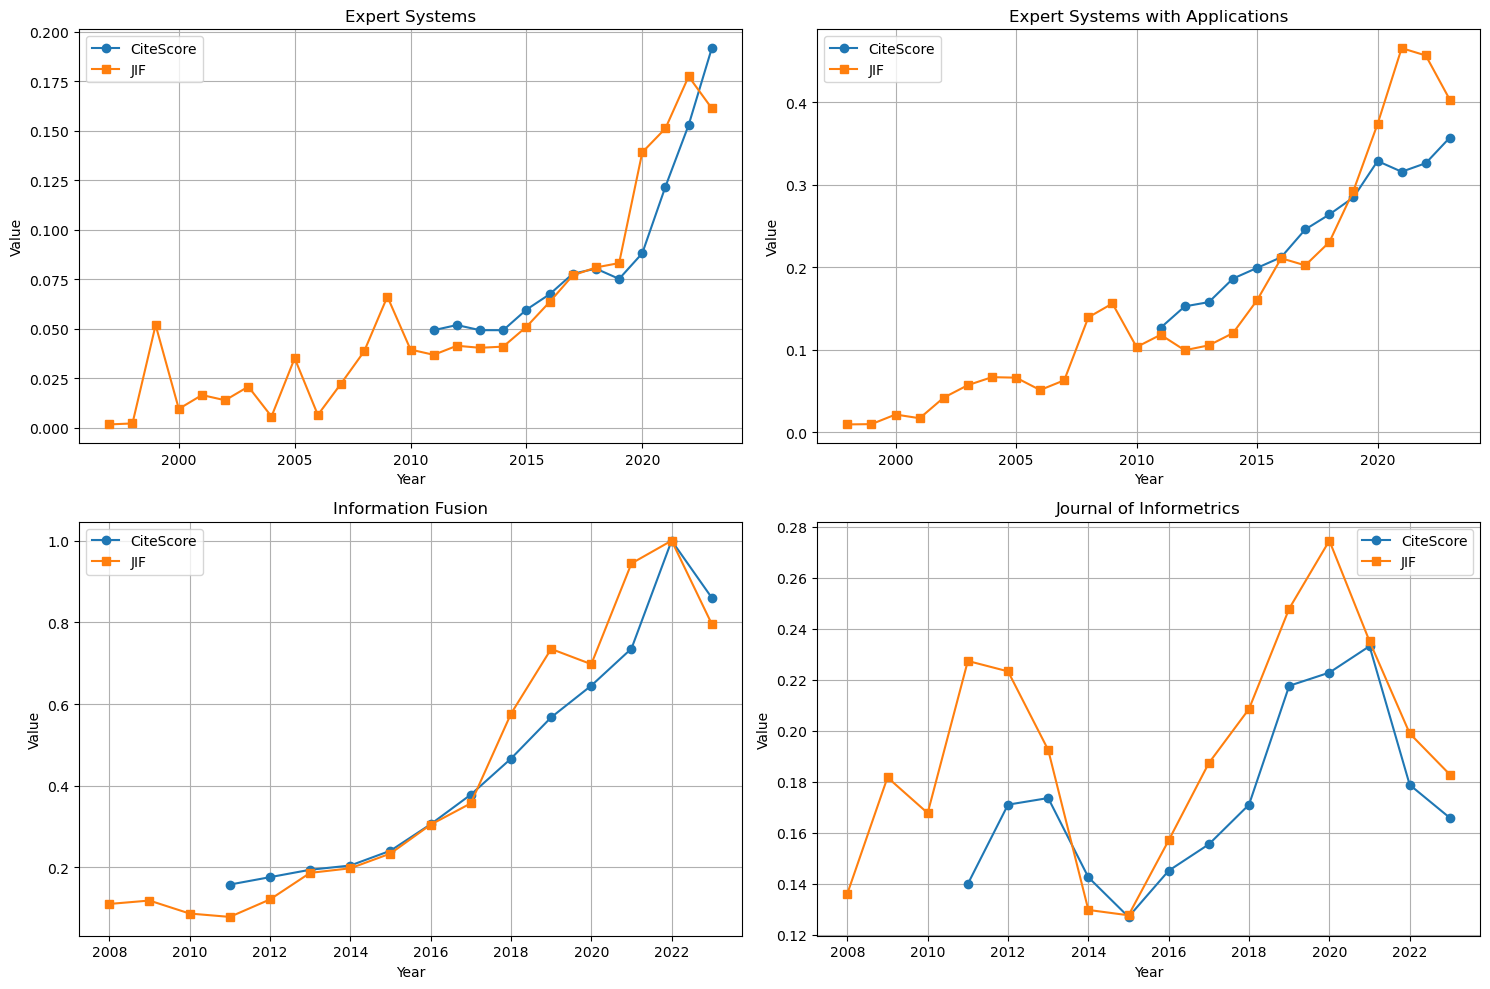

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (실제 파일 경로로 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_maxabs_scaled.csv"
df = pd.read_csv(file_path)

# 필요한 컬럼들을 숫자형으로 변환 (오류 발생 시 NaN 처리)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CiteScore'] = pd.to_numeric(df['CiteScore'], errors='coerce')
df['Journal impact factor'] = pd.to_numeric(df['Journal impact factor'], errors='coerce')

# 비교할 4개의 저널 선택 (데이터에 있는 실제 저널명으로 변경하세요)
selected_journals = ["Expert Systems", "Expert Systems with Applications", "Information Fusion", "Journal of Informetrics"]

# 선택한 저널만 필터링
df_selected = df[df['Source'].isin(selected_journals)]

# 2x2 subplot 생성 (4개 저널용)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axes = axes.flatten()

for i, journal in enumerate(selected_journals):
    ax = axes[i]
    # 해당 저널 데이터 연도 순 정렬
    journal_data = df_selected[df_selected['Source'] == journal].sort_values('Year')
    
    # CiteScore와 JIF (Journal impact factor) 시계열 그래프 그리기
    ax.plot(journal_data['Year'], journal_data['CiteScore'], marker='o', label='CiteScore')
    ax.plot(journal_data['Year'], journal_data['Journal impact factor'], marker='s', label='JIF')
    
    ax.set_title(journal)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

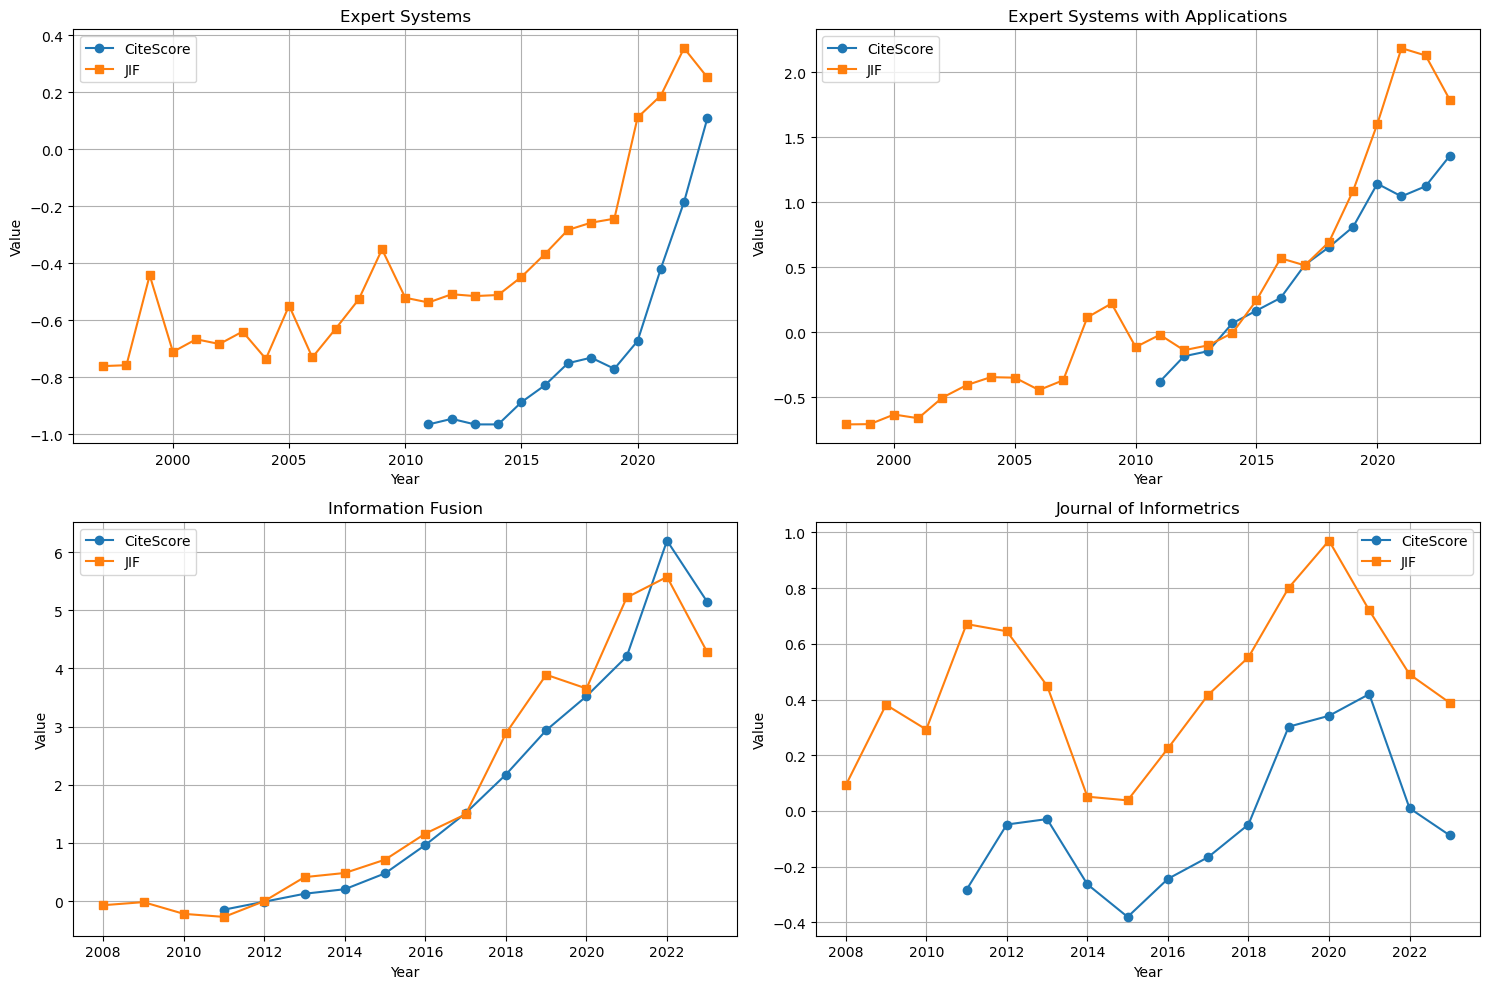

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정 (실제 파일 경로로 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_robust_scaled.csv"
df = pd.read_csv(file_path)

# 필요한 컬럼들을 숫자형으로 변환 (오류 발생 시 NaN 처리)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CiteScore'] = pd.to_numeric(df['CiteScore'], errors='coerce')
df['Journal impact factor'] = pd.to_numeric(df['Journal impact factor'], errors='coerce')

# 비교할 4개의 저널 선택 (데이터에 있는 실제 저널명으로 변경하세요)
selected_journals = ["Expert Systems", "Expert Systems with Applications", "Information Fusion", "Journal of Informetrics"]

# 선택한 저널만 필터링
df_selected = df[df['Source'].isin(selected_journals)]

# 2x2 subplot 생성 (4개 저널용)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axes = axes.flatten()

for i, journal in enumerate(selected_journals):
    ax = axes[i]
    # 해당 저널 데이터 연도 순 정렬
    journal_data = df_selected[df_selected['Source'] == journal].sort_values('Year')
    
    # CiteScore와 JIF (Journal impact factor) 시계열 그래프 그리기
    ax.plot(journal_data['Year'], journal_data['CiteScore'], marker='o', label='CiteScore')
    ax.plot(journal_data['Year'], journal_data['Journal impact factor'], marker='s', label='JIF')
    
    ax.set_title(journal)
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

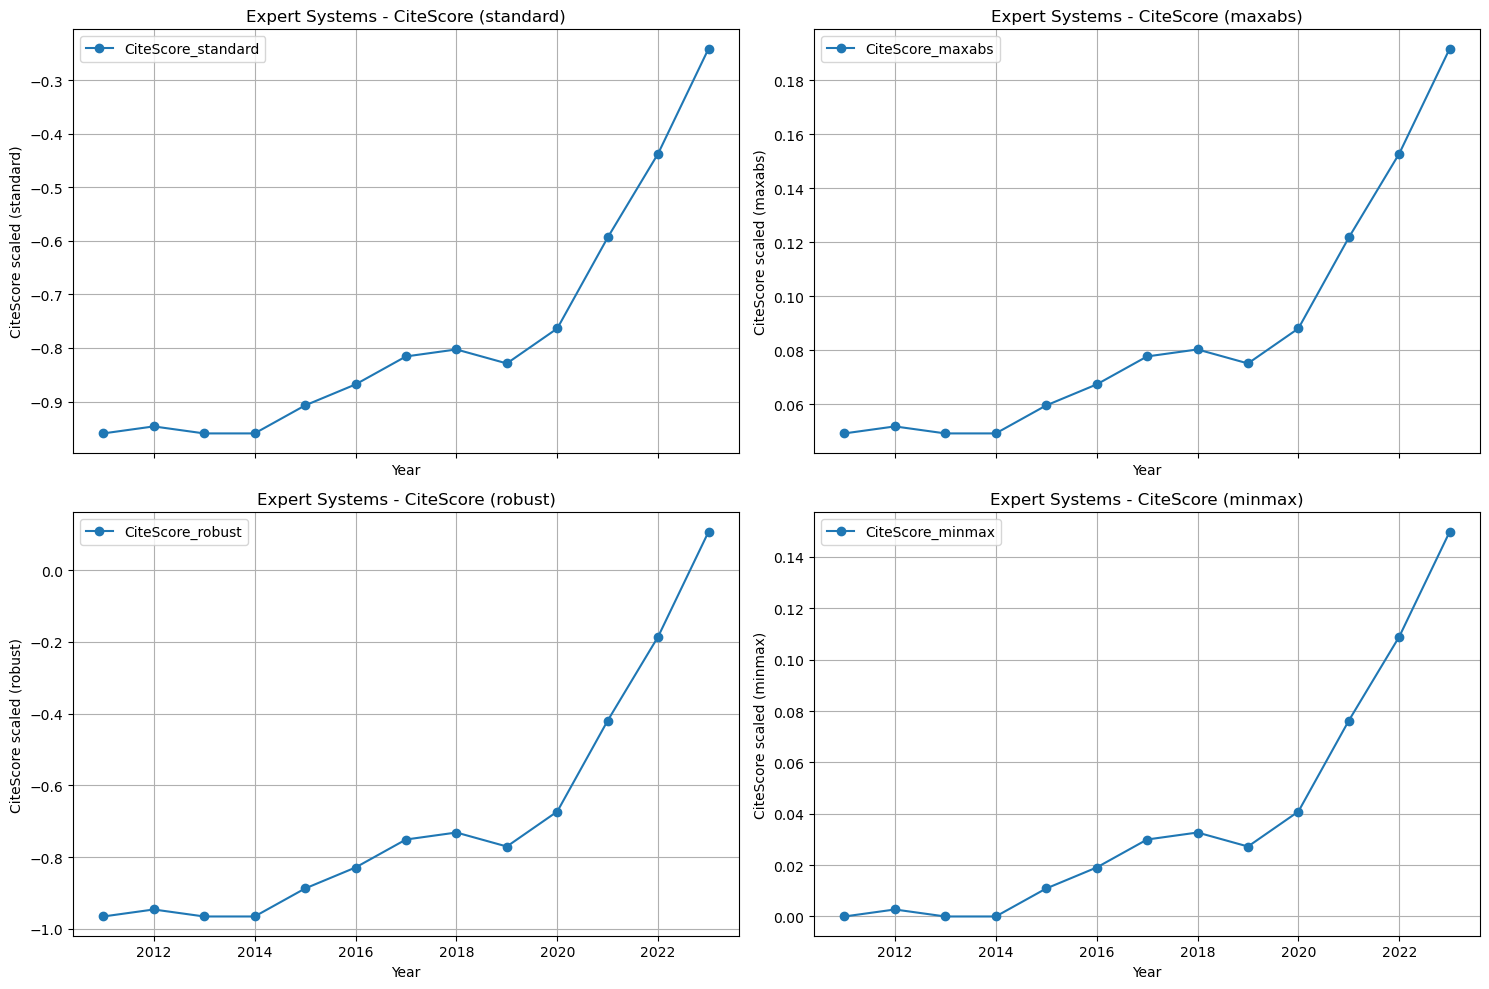

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_transform.csv"
df = pd.read_csv(file_path)

# 2. 필요한 컬럼을 숫자형으로 변환 (Year는 필수)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 파일에는 아래와 같이 컬럼들이 있어야 합니다.
# 예시: 
# CiteScore_raw, CiteScore_standard, CiteScore_minmax, CiteScore_robust, CiteScore_maxabs
# JIF_raw, JIF_standard, JIF_minmax, JIF_robust, JIF_maxabs
# 그리고 Source, Year

# 3. 선택할 저널과 메트릭 지정
selected_journal = "Expert Systems"  # 원하시는 저널명으로 수정
metric = "CiteScore"  # "CiteScore" 또는 "JIF" 중 선택

# 4. 선택한 저널의 데이터 필터링 및 연도별 정렬
df_selected = df[df["Source"] == selected_journal].sort_values("Year")

# 5. 스케일링 방법에 따른 컬럼명 정의
scaler_methods = ["standard", "maxabs", "robust", "minmax"]
# 예: "CiteScore_standard", "CiteScore_maxabs", ...
columns = [f"{metric}_{method}" for method in scaler_methods]

# 6. 2x2 서브플롯 생성해서 각 스케일링 방법별 시계열 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

for i, method in enumerate(scaler_methods):
    ax = axes[i]
    col = f"{metric}_{method}"
    # 해당 스케일링 컬럼이 실제 데이터에 존재하는지 확인 (없으면 건너뜁니다)
    if col in df_selected.columns:
        ax.plot(df_selected["Year"], df_selected[col], marker='o', label=col)
        ax.set_title(f"{selected_journal} - {metric} ({method})")
        ax.set_xlabel("Year")
        ax.set_ylabel(f"{metric} scaled ({method})")
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, f"{col} not found", ha='center', va='center', fontsize=12)
        ax.set_title(f"{selected_journal} - {metric} ({method})")
        ax.set_xlabel("Year")
        ax.set_ylabel(f"{metric} scaled ({method})")

plt.tight_layout()
plt.show()


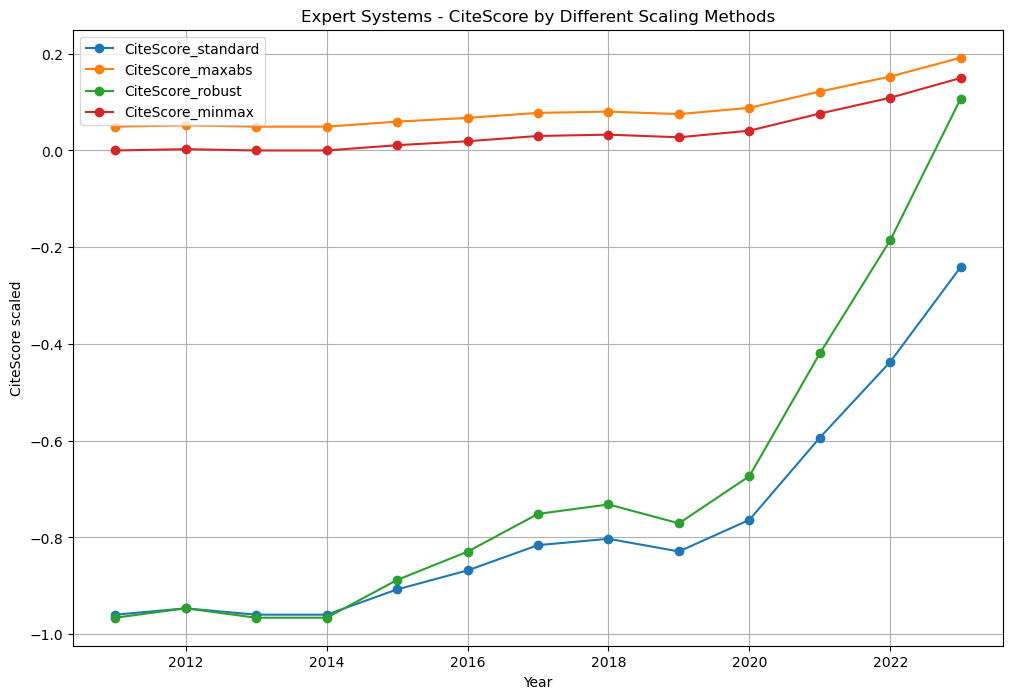

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_transform.csv"
df = pd.read_csv(file_path)

# 2. 필요한 컬럼을 숫자형으로 변환 (Year는 반드시 숫자형)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3. 선택할 저널과 메트릭 지정
selected_journal = "Expert Systems"  # 원하는 저널명으로 수정
metric = "CiteScore"  # "CiteScore" 또는 "JIF" 선택

# 4. 선택한 저널의 데이터 필터링 및 연도별 정렬
df_selected = df[df["Source"] == selected_journal].sort_values("Year")

# 5. 스케일링 방법에 따른 컬럼명 정의
scaler_methods = ["standard", "maxabs", "robust", "minmax"]
columns = [f"{metric}_{method}" for method in scaler_methods]

# 6. 하나의 그림에 각 스케일링 방식을 다른 색깔로 시각화
plt.figure(figsize=(12, 8))
for method, col in zip(scaler_methods, columns):
    if col in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col], marker='o', label=col)
    else:
        print(f"Column {col} not found in the data.")

plt.title(f"{selected_journal} - {metric} by Different Scaling Methods")
plt.xlabel("Year")
plt.ylabel(f"{metric} scaled")
plt.legend()
plt.grid(True)
plt.show()


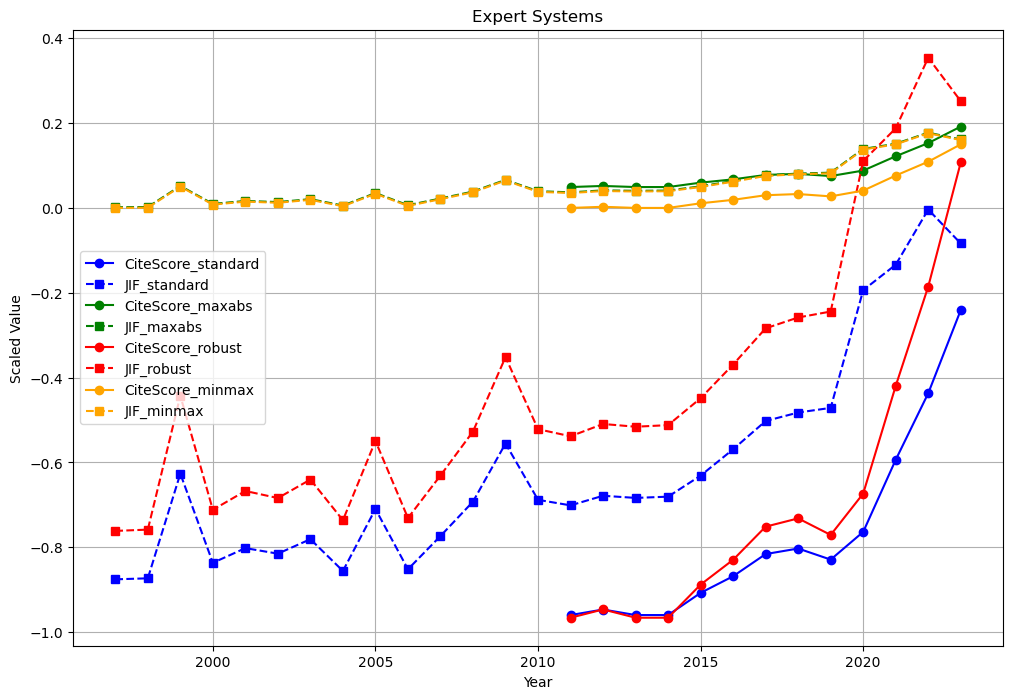

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_transform.csv"
df = pd.read_csv(file_path)

# 2. Year 컬럼을 숫자형으로 변환
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3. 선택할 저널 지정 (원하는 저널명으로 수정)
selected_journal = "Expert Systems"
df_selected = df[df["Source"] == selected_journal].sort_values("Year")

# 4. 스케일링 방법 정의
scaler_methods = ["standard", "maxabs", "robust", "minmax"]

# 5. 각 스케일링 방법에 대해 고유 색상 지정
scaler_colors = {
    "standard": "blue",
    "maxabs": "green",
    "robust": "red",
    "minmax": "orange"
}

# 6. 하나의 그림에 모든 스케일링 방식의 CiteScore와 JIF 곡선을 표시
plt.figure(figsize=(12, 8))
for method in scaler_methods:
    # CiteScore curve
    col_citescore = f"CiteScore_{method}"
    if col_citescore in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_citescore],
                 marker="o", linestyle="-", color=scaler_colors[method],
                 label=f"CiteScore_{method}")
    else:
        print(f"Column {col_citescore} not found")
    
    # JIF curve
    col_jif = f"JIF_{method}"
    if col_jif in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_jif],
                 marker="s", linestyle="--", color=scaler_colors[method],
                 label=f"JIF_{method}")
    else:
        print(f"Column {col_jif} not found")

plt.title(f"{selected_journal}")
plt.xlabel("Year")
plt.ylabel("Scaled Value")
plt.legend()
plt.grid(True)
plt.show()


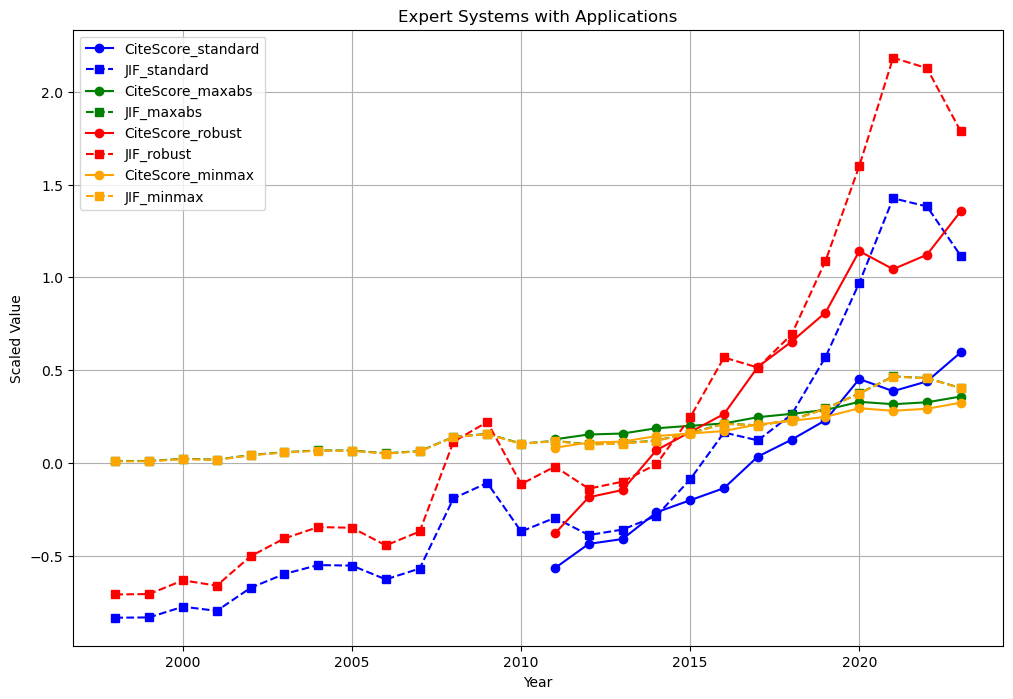

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_transform.csv"
df = pd.read_csv(file_path)

# 2. Year 컬럼을 숫자형으로 변환
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3. 선택할 저널 지정 (원하는 저널명으로 수정)
selected_journal = "Expert Systems with Applications"
df_selected = df[df["Source"] == selected_journal].sort_values("Year")

# 4. 스케일링 방법 정의
scaler_methods = ["standard", "maxabs", "robust", "minmax"]

# 5. 각 스케일링 방법에 대해 고유 색상 지정
scaler_colors = {
    "standard": "blue",
    "maxabs": "green",
    "robust": "red",
    "minmax": "orange"
}

# 6. 하나의 그림에 모든 스케일링 방식의 CiteScore와 JIF 곡선을 표시
plt.figure(figsize=(12, 8))
for method in scaler_methods:
    # CiteScore curve
    col_citescore = f"CiteScore_{method}"
    if col_citescore in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_citescore],
                 marker="o", linestyle="-", color=scaler_colors[method],
                 label=f"CiteScore_{method}")
    else:
        print(f"Column {col_citescore} not found")
    
    # JIF curve
    col_jif = f"JIF_{method}"
    if col_jif in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_jif],
                 marker="s", linestyle="--", color=scaler_colors[method],
                 label=f"JIF_{method}")
    else:
        print(f"Column {col_jif} not found")

plt.title(f"{selected_journal}")
plt.xlabel("Year")
plt.ylabel("Scaled Value")
plt.legend()
plt.grid(True)
plt.show()

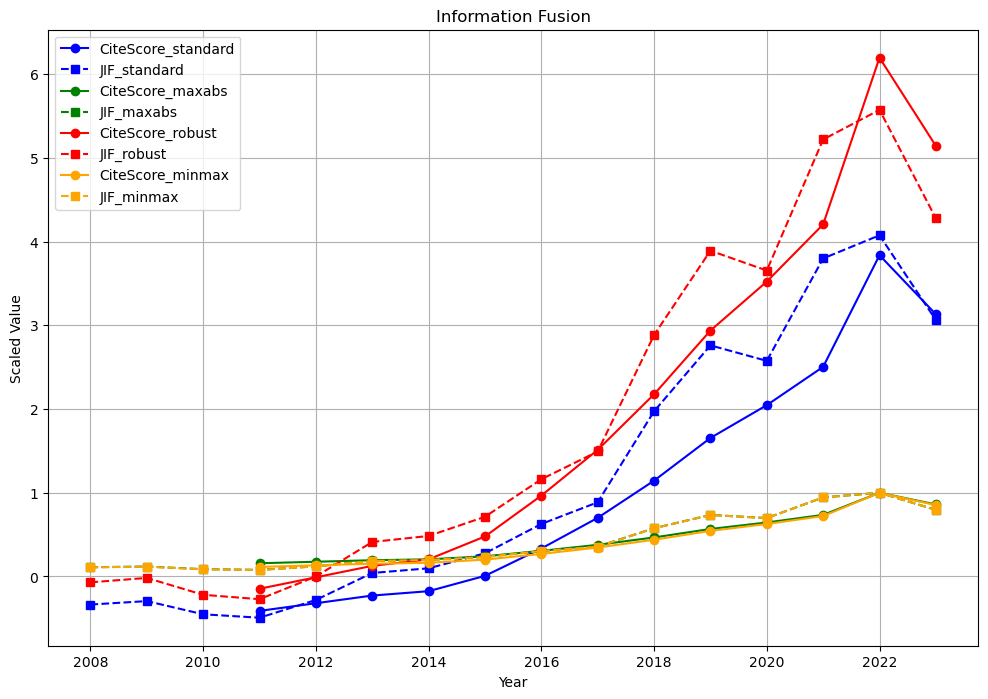

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_transform.csv"
df = pd.read_csv(file_path)

# 2. Year 컬럼을 숫자형으로 변환
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3. 선택할 저널 지정 (원하는 저널명으로 수정)
selected_journal = "Information Fusion"
df_selected = df[df["Source"] == selected_journal].sort_values("Year")

# 4. 스케일링 방법 정의
scaler_methods = ["standard", "maxabs", "robust", "minmax"]

# 5. 각 스케일링 방법에 대해 고유 색상 지정
scaler_colors = {
    "standard": "blue",
    "maxabs": "green",
    "robust": "red",
    "minmax": "orange"
}

# 6. 하나의 그림에 모든 스케일링 방식의 CiteScore와 JIF 곡선을 표시
plt.figure(figsize=(12, 8))
for method in scaler_methods:
    # CiteScore curve
    col_citescore = f"CiteScore_{method}"
    if col_citescore in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_citescore],
                 marker="o", linestyle="-", color=scaler_colors[method],
                 label=f"CiteScore_{method}")
    else:
        print(f"Column {col_citescore} not found")
    
    # JIF curve
    col_jif = f"JIF_{method}"
    if col_jif in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_jif],
                 marker="s", linestyle="--", color=scaler_colors[method],
                 label=f"JIF_{method}")
    else:
        print(f"Column {col_jif} not found")

plt.title(f"{selected_journal}")
plt.xlabel("Year")
plt.ylabel("Scaled Value")
plt.legend()
plt.grid(True)
plt.show()

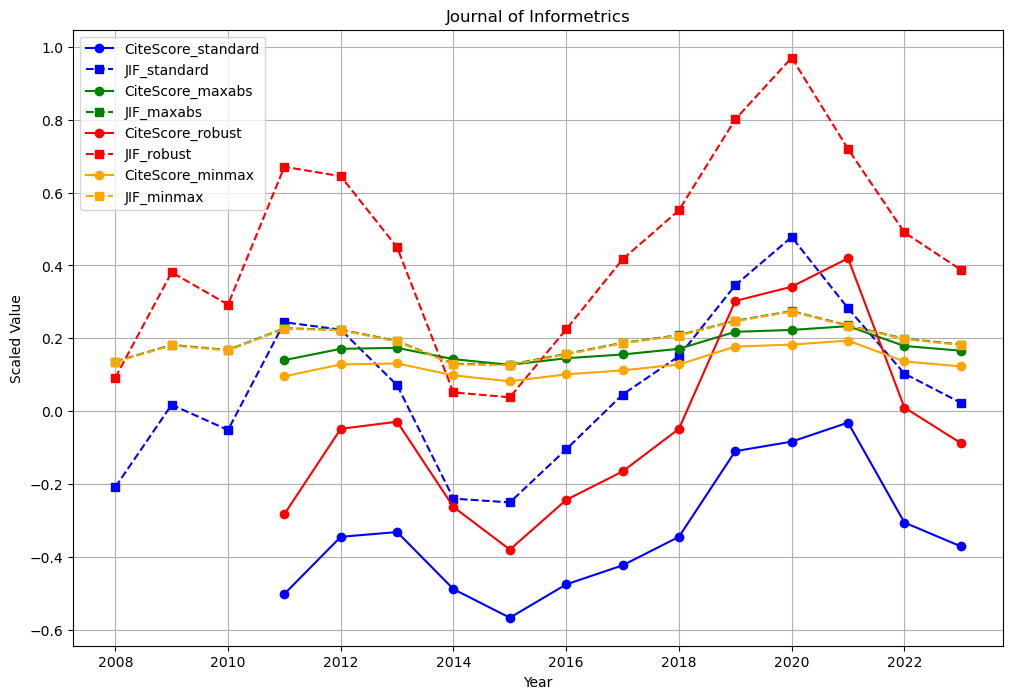

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (파일 경로에 맞게 수정)
file_path = "C:/Users/강유승/OneDrive/바탕 화면/dataset/scopus_webofscience_transform.csv"
df = pd.read_csv(file_path)

# 2. Year 컬럼을 숫자형으로 변환
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3. 선택할 저널 지정 (원하는 저널명으로 수정)
selected_journal = "Journal of Informetrics"
df_selected = df[df["Source"] == selected_journal].sort_values("Year")

# 4. 스케일링 방법 정의
scaler_methods = ["standard", "maxabs", "robust", "minmax"]

# 5. 각 스케일링 방법에 대해 고유 색상 지정
scaler_colors = {
    "standard": "blue",
    "maxabs": "green",
    "robust": "red",
    "minmax": "orange"
}

# 6. 하나의 그림에 모든 스케일링 방식의 CiteScore와 JIF 곡선을 표시
plt.figure(figsize=(12, 8))
for method in scaler_methods:
    # CiteScore curve
    col_citescore = f"CiteScore_{method}"
    if col_citescore in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_citescore],
                 marker="o", linestyle="-", color=scaler_colors[method],
                 label=f"CiteScore_{method}")
    else:
        print(f"Column {col_citescore} not found")
    
    # JIF curve
    col_jif = f"JIF_{method}"
    if col_jif in df_selected.columns:
        plt.plot(df_selected["Year"], df_selected[col_jif],
                 marker="s", linestyle="--", color=scaler_colors[method],
                 label=f"JIF_{method}")
    else:
        print(f"Column {col_jif} not found")

plt.title(f"{selected_journal}")
plt.xlabel("Year")
plt.ylabel("Scaled Value")
plt.legend()
plt.grid(True)
plt.show()